In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pwd

'C:\\Users\\Anubrata99'

In [4]:
cd E:\ANBRATA\Python\Python Assingnment

E:\ANBRATA\Python\Python Assingnment


In [8]:
tic=pd.read_csv('titanic.csv')

In [9]:
tic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
tic.shape

(891, 12)

In [11]:
tic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
for col in tic.columns:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [13]:
tic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
tic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

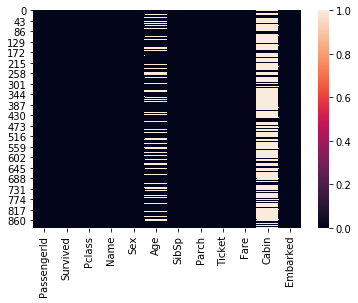

In [15]:
#The columns having null values are: Age, Cabin, Embarked.
# we can make graphical represntation where we can visual easily null value by heatmap

sns.heatmap(tic.isnull())


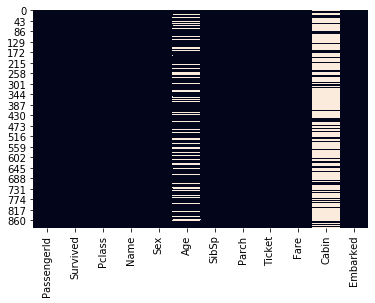

In [16]:
#to remove right side value we use

sns.heatmap(tic.isnull(),cbar=False)

In [19]:

#Observation1:Roughly 20-25 % the age data is missing.Its proportion is likely small enough for reasonable replacement .
            #But in case of cabin,we are missing too much data.
    
    
                   
                      #What we will do for null value??
        
        
       # 1.Incase of Age,as portion is around 20-25%,which is small portion so we will replace that null value with average value 
        #depending on class later
       #2.Incase of Embarked, as count is very much less so we will ignore that null value
       #3.Incase of cabin as portion is very big and cabin column is less important to analysis so we will drop cabin column 

      

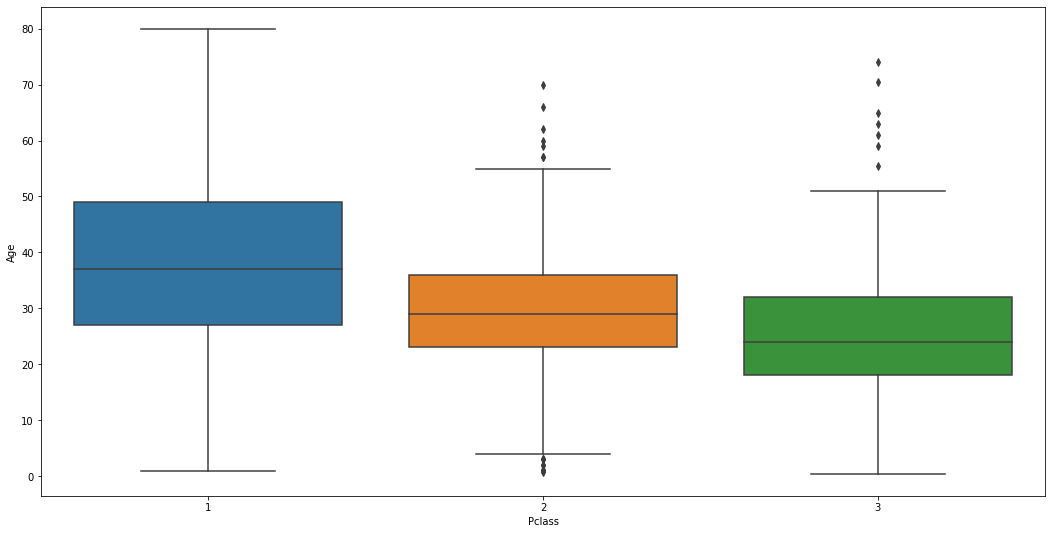

In [26]:
#Data Cleaning
# we will replace null values
mat.figure(figsize=(18,9))  #to manipulate the size
sns.boxplot(x='Pclass',y='Age',data=tic)


In [27]:
#Observation2:From boxplot we observe that avg age of Pclass1 is around 37 more than other classes(Pclass2=29,Pclass3=25)

#We will fill msiing data in age column by mean value based on class
# data will be filled as per below
                #FOR Pclass1,null value will be filled by 37 
                #FOR Pclass2,null value will be filled by 29 
                #FOR Pclass3,null value will be filled by 25 
            
            
  
    

In [41]:
 # CREATING FUNCTION WHICH WILL DIVIDE AGES 
        #(where is value null_with class category)IN 3 CATEGORY 1.age =37(if class1) 2.age=29(if class1) 3.age=25(if class3) 
        
def impute_age(cols):  
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 25
        
    else:
        return Age

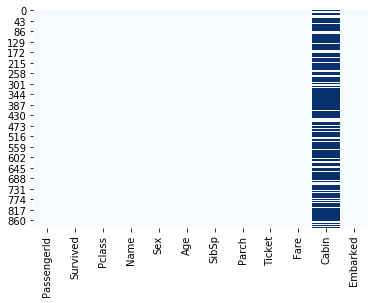

In [44]:
tic['Age']=tic[['Age','Pclass']].apply(impute_age,axis=1)

# to clean null value present in Age
#Now again ploting heat map
sns.heatmap(tic.isnull(),cbar=False,cmap='Blues')


In [97]:
#Null value is replaced by mean based on Pclass,now as portion of Cabin very large so we will remove Cabin
#Less important such ticket,fare are dropped

tic.drop(['Cabin','Ticket','Fare','Name'],axis=1,inplace=True)
tic.drop(['Ticket','Fare','Name'],axis=1,inplace=True)

In [98]:
tic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


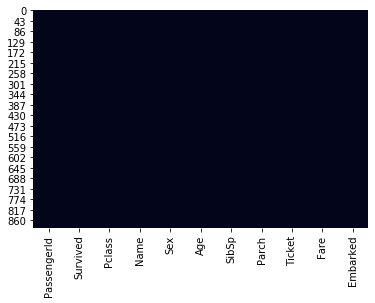

In [53]:
# all null values are either replaced or dropped or ignored
#we can visual by heatmap as below


sns.heatmap(tic.isnull(),cbar=False)

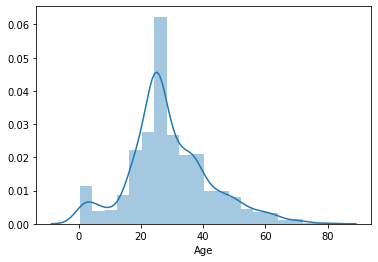

In [56]:
sns.distplot(tic['Age'],bins=20)


In [57]:
#Observation2-We have observed from above graph that most of travellers are inbetwn 20-40 years age


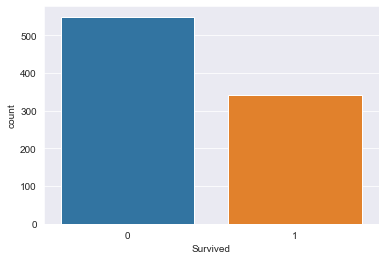

In [59]:
#Survival/Dead Vs Count
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=tic)

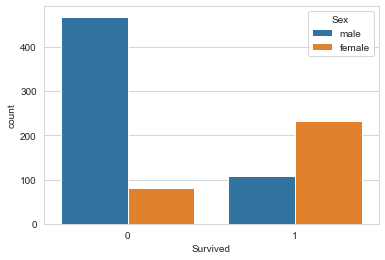

In [61]:
#Observation 3-
      #Dead count is around 550 and survival count is around 350
      # Now we will do analysis count of dead and survival based on sex,age,pclass
        
        
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=tic)

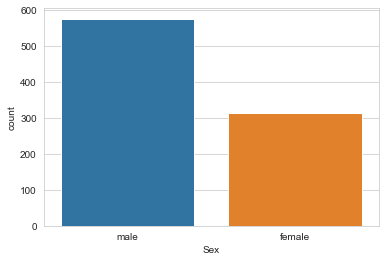

In [62]:

sns.set_style('whitegrid')
sns.countplot(x='Sex',data=tic)

In [63]:
# Death & Suvival based on Sex
             #OBSERVATION 4:

#Death rate is very high around 80% in case of Male ,out of approx 570,death count is 470
#Death rate is very less  around 33% in case of female ,out of approx 310,death count is 105

#Survival rate is very high around 67% in case of female as compared to Male whereas survial rate of male is approx 20%
#for rescue Team,to save lives of  women and children was 1st priority

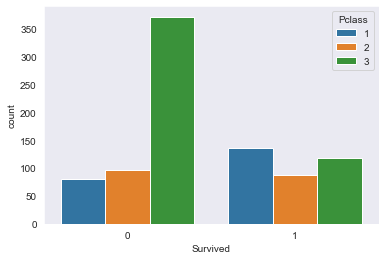

In [65]:
#Survival ANALYSIS BASED ON Pclass

sns.set_style('dark')
sns.countplot(x='Survived',hue='Pclass',data=tic)

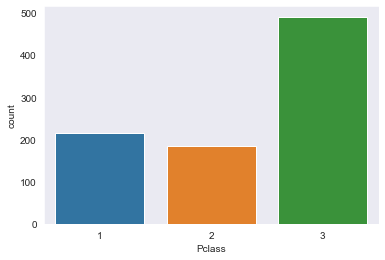

In [69]:
sns.set_style('dark')
sns.countplot(x='Pclass',data=tic)


In [70]:
#Observation 5:
     #Death rate in Pclass3 is much higher approx 65%,death count around 370 out of total death 570
    #Death rate in Pclass3 is much higher approx 78%,death count around 370 out of total death pclass3=480
    
    #We observed that rescue activity was baised on Class also,helping hands were provided to higher class Pclass1 by rescuse 
    # team to survive rather than to others lower classes
    

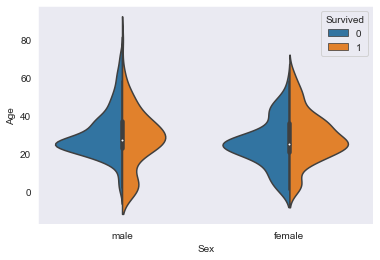

In [88]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=tic,split = True)

In [89]:
#Observation 6
  #This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –

          #Good for children.
          #High for women in the age range 20-50.
         # Less for men as the age increases.

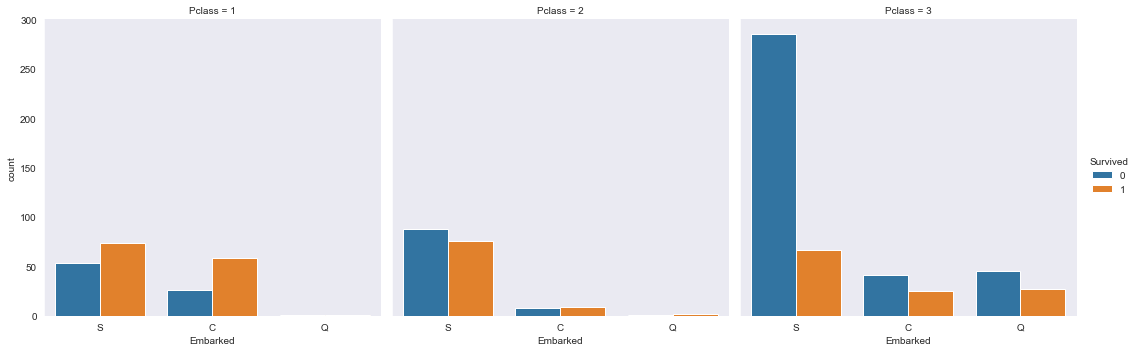

In [93]:
sns.catplot(x ='Embarked', hue ='Survived',  
kind ='count', col ='Pclass', data = tic) 

In [99]:
#Observations7 :

      #Majority of the passengers boarded from S. So, the missing values can be filled with S.
      #Majority of class 3 passengers boarded from Q.
      #S looks lucky for class 1 and 2 passengers compared to class 3.

In [ ]:
Conclusion:
    
   # From my exploratory analysis of Titanic dataset we conclude that, women had higher chances of survival. 
   # We can do a t test to come up with chances(probability) of survival. I also see that Class(Socio-Economic status) 
    #of the passengers had played a role in their survival,survival rate of Pclass1 is much higher where as Death rate in Pclass3 is much higher approx 78%
    #,death count around 370 out of total death pclass3=480 
   #Survival rate is very high around 67% in case of female as compared to Male whereas survial rate of male is approx 20%
   #The survival rate is –

          #Good for children.
          #High for women in the age range 20-50.
         # Less for men as the age increases.
  